In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [83]:
I = cv2.imread('b1.jpg')
B = I[:,:,0]
B1=B.copy()
G = I[:,:,1]
G1=G.copy()
R = I[:,:,2]
R1=R.copy()
cv2.imshow('win1',I)
while 1:
    k = cv2.waitKey()
    if k == ord('o'):
        cv2.imshow('win1',I)
    elif k == ord('b'):
        cv2.imshow('win1',B)
    elif k == ord('g'):
        cv2.imshow('win1',G)
    elif k == ord('r'):
        cv2.imshow('win1',R)
    elif k == ord('q'):
        cv2.destroyAllWindows()
        break


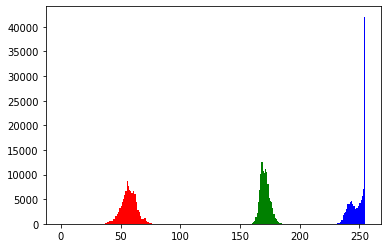

In [84]:
AB=plt.hist(B1.ravel(),bins =list(range(256)),color='blue')
AG=plt.hist(G1.ravel(),bins =list(range(256)),color='green')
AR=plt.hist(R1.ravel(),bins =list(range(256)),color='red')

plt.show()

In [85]:
def IsRed(I):
    
    B1 = I[:,:,0]
    G1 = I[:,:,1]
    R1 = I[:,:,2]
    
    AB=np.histogram(B1.ravel(),bins=np.arange(256))
    AG=np.histogram(G1.ravel(),bins=np.arange(256))
    AR=np.histogram(R1.ravel(),bins=np.arange(256))

    
    Bamount=np.argmax(AB[0])
    Gamount=np.argmax(AG[0])
    Ramount=np.argmax(AR[0])


    if Bamount>200 and Ramount<100 and Gamount<190:
        return True
    else:
        return False
    
def Span(G, n=24, m=32):
    I=G.copy()
    n1,m1,z1=I.shape
    O=[]
    for i in range(n1//n):
        for j in range(m1//m):
            O.append(G[i*n:(i+1)*n, j*m:(j+1)*m, :])
    O=np.array(O)
    O.shape=(n1//n,m1//m,n,m,3)
    return O

def ShowRed(G):
    I=G.copy()
    size=[G.shape[0],G.shape[1]]
    K=np.zeros(size)
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            if IsRed(I[ i , j , : , : ]):
                K[i,j]=255
    return cv2.medianBlur(K.astype(np.uint8),11)


def FindCent(I):
    y_index,x_index=np.nonzero(I)
    h,w=I.shape
    if(y_index.size == 0):
        return None, None
    
#     for f, b in zip(y_index, x_index):   
#         if h-1>f>0 and w-1>b>0:
#             if I[f,b]==255 and I[f-1,b]==255 and I[f+1,b]==255 and I[f,b-1]==255 and I[f,b+1]==255 :
#                 I[f,b]=255
#             else: 
#                 I[f,b]=0
        
            
    y_mean=np.mean(y_index)
    x_mean=np.mean(x_index)
    return int(y_mean),int(x_mean)

In [87]:
# added a second param cv2.CAP_DSHOW
cap = cv2.VideoCapture(0)
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

print(h // 2, w // 2)

offset = 40
start_x = h // 2 - offset
end_x = h // 2 + offset
start_y = w // 2 - offset
end_y = w // 2 + offset

y_cen = (end_y - start_y)//2
x_cen = (end_x - start_x)//2

while 1:

    ret, cam = cap.read()

    I = cam[start_x:end_x, end_y:start_y+1:-1, :]
    # print(I[start_x:end_x, end_y:start_y+1:-1, :])
    # cv2.imshow("init-span", I[start_x:end_x, end_y:start_y+1:-1, :])

    if ret == False:
        break

    T = ShowRed(Span(I, n=3, m=4))
    resizedI = cv2.resize(I, (640, 480), interpolation=cv2.INTER_AREA)
    cv2.imshow("win2", cam)
    cv2.imshow("win1", resizedI)
    resizedT = cv2.resize(T, (640, 480), interpolation=cv2.INTER_AREA)
    cv2.imshow("win3", resizedT)
    

    y_cen_tmp, x_cen_tmp = FindCent(T)

    if(y_cen_tmp == None):
        print('NoRed')
    else:
        y_cen_tmp=y_cen_tmp*3
        x_cen_tmp=x_cen_tmp*4
        change_x = x_cen_tmp - x_cen
        change_y = y_cen_tmp - y_cen
#         print(change_x,change_y)
        
        start_y = start_y + change_y
        end_y = end_y + change_y

        start_x = start_x + change_x
        end_x = end_x + change_x

        x_cen = x_cen_tmp
        y_cen = y_cen_tmp

    key = cv2.waitKey(1)
    if key == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


240 320
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed
NoRed


In [63]:
np.nonzero([[1,2,3],[0,1,2],[0,2,0]])

(array([0, 0, 0, 1, 1, 2], dtype=int64),
 array([0, 1, 2, 1, 2, 1], dtype=int64))